## 0. Import Libraries
In this section libraries used in this study are imported.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

import pydot

## 1. Data Reading
### 1.1. Load data from csv file
Info is read from csv file where the info is stored. The original data can be found using the link below:

https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?resource=download

The last two columns were removed since they will not be used as features. The DataFrame is presented below.

In [2]:
# Csv file saved in the same folder
# Info from file is read and stored in a DataFrame
df = pd.read_csv('BankChurners.csv')
# Drop the last 2 columns
df.drop(labels=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
               'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
               axis=1,inplace=True)
print('Database size =',df.shape)
df.head()

Database size = (10127, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### 1.2. Type of Data
In the following, using the method "info" we can show the type of data stored in the DataFrame. _Float64_ or _Int64_ are numerical value, but _Object_ is not. In order to use the non-numerical info for our purposes, this info should be converted into data that can be used in our analysis.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### 1.3. Hot encoding
DataFrame contains non-numerical values that cannot be directly used as features. To overcome this issue, hot encoding was performed to transform the categorical values into numerical one as shown in the following.

__NOTE:__ Hot encodindg using _OrdinalEncoder_ was employed in lieu of _get_dummies_ method in Pandas.

In [4]:
# get_dummies is NOT used. This section was left only for refereence
# df = pd.get_dummies(df)
# print('Database size =',df.shape)
# df.head()

In [5]:
# Non-numeric info is shown. It will transform into numbers using OrdinalEncored
# "Attrition_Flag" is part of the hot encoding step, and it will be the target of the analysis
# A "mask" is used in order to select the columns of interest
categorical = ['Attrition_Flag', 'Gender','Education_Level', 'Marital_Status','Income_Category', 'Card_Category']
df[categorical].head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [6]:
# OrdinalEncoder is used and the non-numerical columns in DataFrame are replaced with numerical values for processing
ord_enc = preprocessing.OrdinalEncoder()
df[categorical] = ord_enc.fit_transform(df[categorical])
# Client number is removed from the data since it will not use for predictions
df.drop(labels=['CLIENTNUM'],axis=1,inplace=True)

First rows of the updated DataFrame is shown below. All the non-numerical values are now in the form of numbers. Using the command in Pandas, the DataFrame info is also reported.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  float64
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  float64
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  float64
 5   Marital_Status            10127 non-null  float64
 6   Income_Category           10127 non-null  float64
 7   Card_Category             10127 non-null  float64
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,45,1.0,3,3.0,1.0,2.0,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1.0,49,0.0,5,2.0,2.0,4.0,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1.0,51,1.0,3,2.0,1.0,3.0,0.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1.0,40,0.0,4,3.0,3.0,4.0,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1.0,40,1.0,3,5.0,1.0,2.0,0.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
df.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,0.179816,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,0.693039,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### 1.4. Target Info
In the following, we take a look at "target" (i.e. ___Attrition_Flag___) used in the analyses. This column contains only ___ones___ (1s) or ___zeros___ (0s).

In [10]:
print('Composition of the "Target"')
print(df.Attrition_Flag.value_counts())
# We want to know the percentage of "zeros" in the entire array
churn = (df.Attrition_Flag.value_counts()[0] *100 / df.Attrition_Flag.shape)[0]
print("Churn Percentage =","%.1f" %churn,"%")

Composition of the "Target"
1.0    8500
0.0    1627
Name: Attrition_Flag, dtype: int64
Churn Percentage = 16.1 %


In [11]:
churn

16.065962279055988

## 2. Data Preparation
### 2.1. Data Normalization
___Attrition_Flag___ is the "target" of our analysis. All the other columns present in the DataFrame are used as features since they all are numeric. With this aim, X (feature matrix) and y (target vector) are defined below.

Data needs to be preprocessed. The following steps are taken:
1. Using __Preprocessing.MinMaxScaler__ from __sklearn__, the data is normalized
2. Transform the __Target__ into an array, but this is not scaled (i.e. we keep the original values)

In [12]:
X = preprocessing.MinMaxScaler().fit_transform(df.iloc[:,1:]) # feature matrix, i.e. all columns but the 0th.
y = np.array(df.iloc[:,0]) # target vector, i.e. the 0th column of the DataFrame
print('Size of Feature Matrix =',X.shape)
print('Size of Target Vector  =',y.shape)

Size of Feature Matrix = (10127, 19)
Size of Target Vector  = (10127,)


### 2.2. Train and Test Set
The available data is split between ___Train___ and ___Test Set___. Training set is used to "train" the model, while Test set is used later to estimate the accuracy and the  reliability of the model itself. In this study, 75% (test) and 25% (train) split is considered.

In [13]:
test_size = 0.30 # Test size assumed in the data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state = 42)
print('X train set shape =',X_train.shape)
print('y train set shape =',y_train.shape)
print('X test set shape =',X_test.shape)
print('y test set shape =',y_test.shape)

X train set shape = (7088, 19)
y train set shape = (7088,)
X test set shape = (3039, 19)
y test set shape = (3039,)


In addition, we check the churn percentage in both _train_ and _test_ set, and compare it with the set test size. We should expect that the percentage of "churn" on each set should be approximately the same.

In [14]:
print('"Churn" in "y Train Set" is',y_train[y_train==0].shape[0],'versus',
      '%.0f' %(df.Attrition_Flag.shape[0] * (1-test_size) * churn/100),'expected')
print('"Churn" in "y Test Set" is',y_test[y_test==0].shape[0],'versus',
      '%.0f' %(df.Attrition_Flag.shape[0] * test_size * churn/100),'expected')

"Churn" in "y Train Set" is 1131 versus 1139 expected
"Churn" in "y Test Set" is 496 versus 488 expected


## 3.0. Data Analysis
In the following a few different models are used for the analysis. In particular, for each approach, the following steps are taken:
- Model selection, importing the estimator class from Skikit Learn
- The class (model) is instantiated setting its hyper-parameters
- Fit the model using the training data
- Predict the test values using the test feature matrix
- Compare the results and estimate the accuracy of the model

__NOTE:__ Several models can be used, and each model can also have different hyper-parameters. In this study, few different models are used. The different outcomes from selecting different hyper-parameters for each model are not considered.


### 3.1. Random Forest Classifier
As mentioned in the general section, the model is instantiated setting the hyper-parameters, fif the model with the train data, and predict the target using the test feature matrix.


In [15]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
y_hat = rf.predict(X_test)

Taking a look at the ___y,hat___ vector, there are values that are not 0 or 1, but something closer to them. This is expected. An additional step is needed to "clean" the predicted values i.e. assign 0 or 1 depending on how far the predicted values are. The procedure below has this aim. Round to integer (np.rint) is used.


__NOTE:__ The "rounding step" could be avoided since Sklearn provided metrics that deal with this type of output. Here it was performed for clarity.

In [16]:
# Round the values to 0 or 1
y_hat_cleaned = np.rint(y_hat) 
# Create a DataFrame used for comparison and to count correct guesses
rfc_count_right = pd.DataFrame({'Test':y_test,'Predict':y_hat_cleaned}) 
rfc_right =  100 * (rfc_count_right[rfc_count_right['Test'] == rfc_count_right['Predict']].shape[0] / rfc_count_right.shape[0])

### 3.2. Random Forest Classifier Scores
After the prediction step is completed, the model results are evaluated against the test values. Below the metrics considered.

In [17]:
print('Model Accuracy Score = {:.1f}'.format(rfc_right))
print('Mean Squared Error   = {:.4f}'.format(mean_squared_error(y_test,y_hat)))
print('R-Square Score       = {:.4f}'.format(r2_score(y_test,y_hat)))

Model Accuracy Score = 96.0
Mean Squared Error   = 0.0325
R-Square Score       = 0.7623


### 3.3. Confusion Matrix
Using the Random Forest Classifier, predicted _y,hat_ values are not exactly 0 or 1. For this reason, the results are rounded up or down (see note previous section). After this transformation, _Confusion Matrix_ can be considered as shown.

True Positive  = 2496
False Positive = 78
True Negative  = 418
False Negative = 47

F1-Score = 0.976


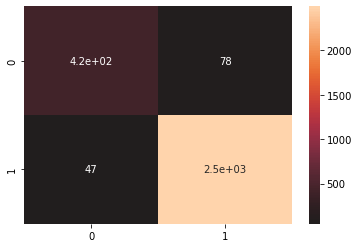

In [18]:
y_hat[y_hat < 0.5] = 0 # Round down to 0 the values close to zero
y_hat[y_hat >= 0.5] = 1 # Round up to 1 the values close to one
# Confusion matrix
conf_matr = confusion_matrix(y_test,y_hat)
sns.heatmap(conf_matr, annot=True, center=False)
print("True Positive  =",conf_matr[1,1])
print("False Positive =",conf_matr[0,1])
print("True Negative  =",conf_matr[0,0])
print("False Negative =",conf_matr[1,0])

print('\nF1-Score =','{:.3f}'.format(f1_score(y_test, y_hat)))

### 3.4. Random Classifier Feature Importance
The importance of each feature used in the prediction is reported below. 

                          Importance
Total_Trans_Ct              0.297288
Total_Revolving_Bal         0.187879
Total_Trans_Amt             0.147407
Total_Relationship_Count    0.078151
Total_Ct_Chng_Q4_Q1         0.072791
Total_Amt_Chng_Q4_Q1        0.056573
Customer_Age                0.038954
Avg_Open_To_Buy             0.017594
Credit_Limit                0.017304
Contacts_Count_12_mon       0.017185
Months_on_book              0.015937
Months_Inactive_12_mon      0.012571
Avg_Utilization_Ratio       0.012531
Education_Level             0.006633
Marital_Status              0.006289
Dependent_count             0.005877
Income_Category             0.004597
Gender                      0.003352
Card_Category               0.001086


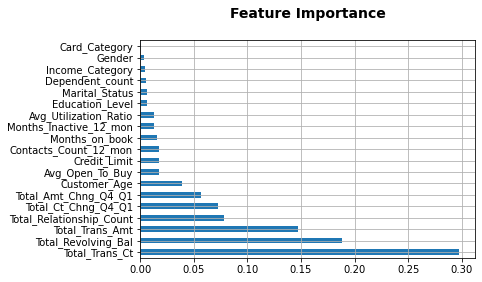

In [19]:
# Create the DataFrame with the features and the related importante
feature_importance = pd.DataFrame({'Importance':rf.feature_importances_},index=df.iloc[:,1:].columns).sort_values(by='Importance',ascending=False)
print(feature_importance)

# Print the feature importance in a bar graph
feature_importance.plot(kind='barh',legend=False)
plt.title('Feature Importance\n',fontsize=14,fontweight='bold')
plt.grid()
plt.show()

### 3.4. Random Forest Classifier Tree Visualization
The last step is to show a specific tree coming from the analysis. In the Random Forest Classifier, several trees are created. The algoritm illustrated below shows a specific tree and save the image in a .png file.

In [ ]:
# Pull out one tree from the forest
no_tree = 2 # This is the tree number (change this value to see a specific tree)
tree = rf.estimators_[no_tree]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = df.iloc[:,1:].columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')